In [3]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
apiKey = "RFpisddKPyeh5kKXMjSsF9v2k" 

apiSecret = "xg8hxlImmwxpWDMW7GFXb1bznYJxab0JAoH96UhftDckiNNRIX" 

accessToken ="752924292-lwKezVqihULknbM36s76q5AcMMrishIe3DdcQ6Um" 

accessSecret = "WqfkTPE7ioTQw79WHB3hvZ7SBt5Do1z8TXN9APqY9MTMw" 

In [5]:
auth = tweepy.OAuthHandler(apiKey, apiSecret)
auth.set_access_token(accessToken, accessSecret)
api = tweepy.API(auth)

try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


In [6]:
user = api.get_user('ditiro_dt')
print(user.name)
print(user.description)
print(user.location)

TypeError: get_user() takes 1 positional argument but 2 were given

In [7]:
#extracts 10000 tweets from twitter user
posts = api.user_timeline(screen_name="WIONews", count= 10000)

#print the 5 ltest
i=1
print("show the 5 recent twwets: \n")
for tweet in posts[0:5]:
  print(str(i)+') ' +tweet.text+ '\n')
  i = i+1

show the 5 recent twwets: 

1) The Department of Posts has for the first time delivered mail using a drone as part of a pilot project in Gujarat's… https://t.co/jMj2p93e5f

2) Tucked in a remote corner of South Africa, this frightened village of 3,000 people has suffered a murder almost eve… https://t.co/2Fq939Z3Ym

3) According to the FDA, at least 17 illnesses and 12 hospitalizations have been reported thus far across the country

https://t.co/YVQOKAlg33

4) Why these men hugged for 24 hours in Croatia. Watch!

https://t.co/cTsdPp0EWa

5) The second round of voting, which will take place on June 19, will decide who will emerge victorious

https://t.co/6RBdQotc1o



In [8]:
#create a df
df =pd.DataFrame([tweet.text for tweet in posts], columns=["Tweets"])
df.head()

,Tweets
0,The Department of Posts has for the first time...
1,"Tucked in a remote corner of South Africa, thi..."
2,"According to the FDA, at least 17 illnesses an..."
3,Why these men hugged for 24 hours in Croatia. ...
4,"The second round of voting, which will take pl..."


In [9]:
def cleanTweets(text):
  punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
  # Substituting multiple spaces with single space
  text = re.sub(r'\s+', ' ', text, flags=re.I) 
    # Remove all the special characters
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)


  return text


In [10]:
df["Tweets"]=  df["Tweets"].apply(cleanTweets)
df.head()

,Tweets
0,The Department of Posts has for the first time...
1,Tucked in a remote corner of South Africa thi...
2,According to the FDA at least 17 illnesses an...
3,Why these men hugged for 24 hours in Croatia ...
4,The second round of voting which will take pl...


In [11]:
#subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity



In [12]:
df['Subjectivity'] = df["Tweets"].apply(getSubjectivity)
df['Polarity'] = df["Tweets"].apply(getPolarity)
df.head()

,Tweets,Subjectivity,Polarity
0,The Department of Posts has for the first time...,0.333333,0.25
1,Tucked in a remote corner of South Africa thi...,0.200000,-0.10
2,According to the FDA at least 17 illnesses an...,0.700000,-0.10
3,Why these men hugged for 24 hours in Croatia ...,0.000000,0.00
4,The second round of voting which will take pl...,0.200000,-0.10


(-0.5, 499.5, 299.5, -0.5)

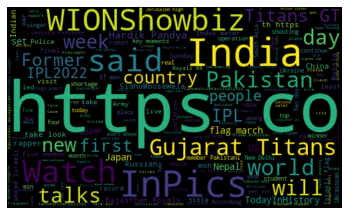

In [22]:
#wordclout
allwords = ' '.join([twts for twts in df["Tweets"]])#
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size =119).generate(allwords)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')

In [13]:
#negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score ==0:
    return "Neutral"
  else:
    return "Positive"

df["Analysis"]=df["Polarity"].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,The Department of Posts has for the first time...,0.333333,0.25,Positive
1,Tucked in a remote corner of South Africa thi...,0.200000,-0.10,Negative
2,According to the FDA at least 17 illnesses an...,0.700000,-0.10,Negative
3,Why these men hugged for 24 hours in Croatia ...,0.000000,0.00,Neutral
4,The second round of voting which will take pl...,0.200000,-0.10,Negative


In [14]:
#positive tweets
j = 1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) +') '+ sortedDF['Tweets'][i])
    print()
    j =j+1

1) The Department of Posts has for the first time delivered mail using a drone as part of a pilot project in Gujarat s  https   t co jMj2p93e5f

2) After widespread panic on social media  India has withdrawn a warning about not to share photocopies of the  https   t co 44ZEWjb17J

3) Shruti Sharma took first place in the exam  with Ankita Agarwal and Gamini Singla coming in second and third  respe  https   t co VjG9AxVgOK

4) Pakistan has debuted at the Cannes film festival with its independent movie  Joyland  nominated in the Un Certain R  https   t co oBujBiJcMm

5) As India and Pakistan meet for the annual meeting under the  IndusWaterTreaty in New Delhi  let us get acquainted w  https   t co 69uf4Djwle

6) Scotland s Tom Stoltman reigned supreme in the final of the World s Strongest Man 2022 competition to win the prest  https   t co cXDk9E3YUx

7)  Partygate  More trouble for UK PM Boris Johnson as his wife is now under the scanner  Watch  https   t co aNw1uRNzU3

8) Netizens have

In [15]:
#positive tweets
j = 1
sortedDF = df.sort_values(by=["Polarity"], ascending="False")
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) +') '+ sortedDF['Tweets'][i])
    print()
    j =j+1

ValueError: For argument "ascending" expected type bool, received type str.

In [ ]:
#positive tweets
j = 1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) +') '+ sortedDF['Tweets'][i])
    print()
    j =j+1

In [ ]:
#plot the analysis
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")
plt.title('Sentiments Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [17]:
df.to_csv('Tweets.csv', index=False)